In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

df=pd.read_csv("/kaggle/input/perovskites-data/Perovskite_data.csv")

In [2]:
df

,mp_id,formula,sites,composition,a_edge (angstrom),b_edge (angstrom),c_edge (angstrom),alpha_ang (deg),beta_ang (deg),gamma_ang (deg),...,energy_per_atom (eV/atom),formation_energy (eV/atom),energy_above_hull (eV/atom),stable,density (g/cc),band_gap (eV),direct_bandgap,volume (cubic-angstrom),bulk_modulus (GPa),shear_modulus (GPa)
0,mp-1183115,AcAlO3,5,Ac1 Al1 O3,3.858634,3.858634,3.858634,90.000000,90.0,90.000000,...,-8.232146,-3.690019,0.000000,True,8.728230,4.1024,True,57.451413,NaN,NaN
1,mp-1183052,AcBO3,5,Ac1 B1 O3,3.721668,3.721668,3.721668,90.000000,90.0,90.000000,...,-7.604280,-2.475390,0.792473,False,9.206879,0.8071,False,51.548126,NaN,NaN
2,mp-866101,AcCrO3,5,Ac1 Cr1 O3,3.944287,3.944302,3.944272,90.000000,90.0,90.000000,...,-8.862593,-3.138972,0.000000,True,8.848788,2.0031,False,61.362845,NaN,NaN
3,mp-864606,AcCuO3,5,Ac1 Cu1 O3,3.913331,3.913331,3.913331,90.000000,90.0,90.000000,...,-7.035745,-2.422892,0.000000,True,9.380471,0.0000,False,59.929387,"{'voigt': 163.571, 'reuss': 163.571, 'vrh': 16...","{'voigt': 81.813, 'reuss': 81.632, 'vrh': 81.723}"
4,mp-861502,AcFeO3,5,Ac1 Fe1 O3,3.953570,3.953568,3.953585,90.000092,90.0,90.000000,...,-8.258555,-2.771539,0.000000,True,8.889999,0.9888,False,61.797311,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,mp-1182197,NdMnO3,20,Nd1 Mn1 O3,14.392943,14.078227,19.909366,87.880792,90.0,90.000000,...,-4.747233,1.007576,3.971055,False,0.407250,0.0000,False,4031.418295,NaN,NaN
4553,mp-1189476,NdMnO3,20,Nd1 Mn1 O3,5.499704,5.657811,7.900171,89.429250,90.0,90.000000,...,-8.706946,-2.952136,0.011342,False,6.679080,0.0000,False,245.811781,NaN,NaN
4554,mp-20852,NdMnO3,20,Nd1 Mn1 O3,5.439007,5.594976,7.743939,90.000000,90.0,90.000000,...,-8.718288,-2.963479,0.000000,True,6.966900,1.8980,True,235.656683,NaN,NaN
4555,mp-1079171,NdNiGe3,10,Nd1 Ni1 Ge3,11.049211,11.049211,4.170587,90.000000,90.0,158.488336,...,-5.481031,-0.597557,0.000000,True,7.486044,0.0000,False,186.706574,NaN,NaN


In [3]:
mdf=pd.read_csv("/kaggle/input/magpie-perov/CBFV_magpie_extracted_features.csv")

In [4]:
mdf

,composition,formation_energy (eV/atom),band_gap (eV),sum_Number,sum_MendeleevNumber,sum_AtomicWeight,sum_MeltingT,sum_Column,sum_Row,sum_CovalentRadius,...,mode_NValence,mode_NsUnfilled,mode_NpUnfilled,mode_NdUnfilled,mode_NfUnfilled,mode_NUnfilled,mode_GSvolume_pa,mode_GSbandgap,mode_GSmagmom,mode_SpaceGroupNumber
0,Ac1 Al1 O3,-3.690019,4.1024,126.0,348.0,301.979739,2420.87,64.0,16.0,534.0,...,6.0,0.0,2.0,0.0,0.0,2.0,9.105000,0.000,0.0,12.0
1,Ac1 Cr1 O3,-3.138972,2.0031,137.0,324.0,326.994300,3667.40,57.0,17.0,552.0,...,6.0,0.0,2.0,0.0,0.0,2.0,9.105000,0.000,0.0,12.0
2,Ac1 Cu1 O3,-2.422892,0.0000,142.0,339.0,338.544200,2845.17,62.0,17.0,545.0,...,6.0,0.0,2.0,0.0,0.0,2.0,9.105000,0.000,0.0,12.0
3,Ac1 Fe1 O3,-2.771539,0.9888,139.0,330.0,330.843200,3298.40,59.0,17.0,545.0,...,6.0,0.0,2.0,0.0,0.0,2.0,9.105000,0.000,0.0,12.0
4,Ac1 Ga1 O3,-3.063253,2.8959,144.0,349.0,344.721200,1790.31,64.0,17.0,535.0,...,6.0,0.0,2.0,0.0,0.0,2.0,9.105000,0.000,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Nd1 Lu1 S3,-2.393228,0.8052,179.0,324.0,415.403800,4395.08,54.0,21.0,703.0,...,6.0,0.0,2.0,0.0,0.0,2.0,25.786875,2.202,0.0,70.0
1008,Nd1 Lu1 Se3,-2.187057,0.4956,233.0,327.0,556.088800,4712.00,54.0,24.0,748.0,...,16.0,0.0,2.0,0.0,0.0,2.0,25.920000,0.799,0.0,14.0
1009,Nd1 Mn1 O3,-2.963479,1.8980,109.0,332.0,247.178245,2977.40,58.0,16.0,538.0,...,6.0,0.0,2.0,0.0,0.0,2.0,9.105000,0.000,0.0,12.0
1010,Nd1 Ni1 Ge3,-0.597557,0.0000,184.0,317.0,420.855400,6656.20,55.0,22.0,685.0,...,14.0,0.0,4.0,0.0,0.0,4.0,23.005000,0.383,0.0,225.0


In [5]:
m_fe_features= [
    'mode_AtomicWeight',
    'max_Electronegativity',
    'avg_Electronegativity',
    'dev_Electronegativity',
    'sum_Electronegativity',
    'mode_Row',
    'mode_GSvolume_pa',
    'mode_CovalentRadius',
    'range_Electronegativity',
    'avg_Column',
    'dev_NpUnfilled',
    'mode_MendeleevNumber',
    'mode_MeltingT',
    'mode_Number',
    'min_CovalentRadius',
    'dev_NpValence',
    'min_MeltingT',
    'mode_SpaceGroupNumber',
    'sum_NpValence',
    'mode_NValence',
    'max_MendeleevNumber',
    'dev_NdValence',
    'avg_CovalentRadius',
    'avg_NpValence',
    'min_AtomicWeight',
    'min_SpaceGroupNumber',
    'min_GSvolume_pa',
    'mode_Column',
    'min_Number'
]
m_fe_features

['mode_AtomicWeight',
 'max_Electronegativity',
 'avg_Electronegativity',
 'dev_Electronegativity',
 'sum_Electronegativity',
 'mode_Row',
 'mode_GSvolume_pa',
 'mode_CovalentRadius',
 'range_Electronegativity',
 'avg_Column',
 'dev_NpUnfilled',
 'mode_MendeleevNumber',
 'mode_MeltingT',
 'mode_Number',
 'min_CovalentRadius',
 'dev_NpValence',
 'min_MeltingT',
 'mode_SpaceGroupNumber',
 'sum_NpValence',
 'mode_NValence',
 'max_MendeleevNumber',
 'dev_NdValence',
 'avg_CovalentRadius',
 'avg_NpValence',
 'min_AtomicWeight',
 'min_SpaceGroupNumber',
 'min_GSvolume_pa',
 'mode_Column',
 'min_Number']

In [6]:
m_bg_features= [
    'sum_MeltingT',
    'mode_NpUnfilled',
    'sum_NpValence',
    'avg_Electronegativity',
    'max_Electronegativity',
    'mode_NUnfilled',
    'max_NpValence',
    'mode_NpValence',
    'min_MeltingT',
    'avg_NpValence',
    'mode_Column',
    'max_Column',
    'mode_Electronegativity',
    'avg_MeltingT',
    'dev_NpValence',
    'mode_GSvolume_pa',
    'mode_NValence',
    'min_GSvolume_pa',
    'range_Column',
    'sum_Column',
    'mode_MendeleevNumber',
    'max_MendeleevNumber',
    'sum_Electronegativity',
    'mode_MeltingT',
    'range_SpaceGroupNumber',
    'mode_Number',
    'mode_AtomicWeight',
    'dev_SpaceGroupNumber',
    'dev_Column',
    'sum_MendeleevNumber'
]
m_bg_features

['sum_MeltingT',
 'mode_NpUnfilled',
 'sum_NpValence',
 'avg_Electronegativity',
 'max_Electronegativity',
 'mode_NUnfilled',
 'max_NpValence',
 'mode_NpValence',
 'min_MeltingT',
 'avg_NpValence',
 'mode_Column',
 'max_Column',
 'mode_Electronegativity',
 'avg_MeltingT',
 'dev_NpValence',
 'mode_GSvolume_pa',
 'mode_NValence',
 'min_GSvolume_pa',
 'range_Column',
 'sum_Column',
 'mode_MendeleevNumber',
 'max_MendeleevNumber',
 'sum_Electronegativity',
 'mode_MeltingT',
 'range_SpaceGroupNumber',
 'mode_Number',
 'mode_AtomicWeight',
 'dev_SpaceGroupNumber',
 'dev_Column',
 'sum_MendeleevNumber']

In [7]:

# Filter relevant columns for each target
fe_df = mdf[['composition', 'formation_energy (eV/atom)'] + m_fe_features]
bg_df = mdf[['composition', 'band_gap (eV)'] + m_bg_features]

In [8]:
fe_df

,composition,formation_energy (eV/atom),mode_AtomicWeight,max_Electronegativity,avg_Electronegativity,dev_Electronegativity,sum_Electronegativity,mode_Row,mode_GSvolume_pa,mode_CovalentRadius,...,mode_NValence,max_MendeleevNumber,dev_NdValence,avg_CovalentRadius,avg_NpValence,min_AtomicWeight,min_SpaceGroupNumber,min_GSvolume_pa,mode_Column,min_Number
0,Ac1 Al1 O3,-3.690019,15.9994,3.44,2.606,1.0008,13.03,2.0,9.105000,66.0,...,6.0,87.0,0.32,106.8,2.6,15.9994,12.0,9.105000,16.0,8.0
1,Ac1 Cr1 O3,-3.138972,15.9994,3.44,2.616,0.9888,13.08,2.0,9.105000,66.0,...,6.0,87.0,1.52,110.4,2.4,15.9994,12.0,9.105000,16.0,8.0
2,Ac1 Cu1 O3,-2.422892,15.9994,3.44,2.664,0.9312,13.32,2.0,9.105000,66.0,...,6.0,87.0,3.12,109.0,2.4,15.9994,12.0,9.105000,16.0,8.0
3,Ac1 Fe1 O3,-2.771539,15.9994,3.44,2.650,0.9480,13.25,2.0,9.105000,66.0,...,6.0,87.0,1.84,109.0,2.4,15.9994,12.0,9.105000,16.0,8.0
4,Ac1 Ga1 O3,-3.063253,15.9994,3.44,2.646,0.9528,13.23,2.0,9.105000,66.0,...,6.0,87.0,3.12,107.0,2.6,15.9994,12.0,9.105000,16.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Nd1 Lu1 S3,-2.393228,32.0650,2.58,2.030,0.6600,10.15,3.0,25.786875,105.0,...,6.0,88.0,0.32,140.6,2.4,32.0650,70.0,25.786875,16.0,16.0
1008,Nd1 Lu1 Se3,-2.187057,78.9600,2.55,2.012,0.6456,10.06,4.0,25.920000,120.0,...,16.0,89.0,4.56,149.6,2.4,78.9600,14.0,25.920000,16.0,34.0
1009,Nd1 Mn1 O3,-2.963479,15.9994,3.44,2.602,1.0056,13.01,2.0,9.105000,66.0,...,6.0,87.0,1.60,107.6,2.4,15.9994,12.0,9.105000,16.0,8.0
1010,Nd1 Ni1 Ge3,-0.597557,72.6400,2.01,1.816,0.2704,9.08,4.0,23.005000,120.0,...,14.0,79.0,3.04,137.0,1.2,58.6934,194.0,10.320000,14.0,28.0


In [9]:
bg_df

,composition,band_gap (eV),sum_MeltingT,mode_NpUnfilled,sum_NpValence,avg_Electronegativity,max_Electronegativity,mode_NUnfilled,max_NpValence,mode_NpValence,...,mode_MendeleevNumber,max_MendeleevNumber,sum_Electronegativity,mode_MeltingT,range_SpaceGroupNumber,mode_Number,mode_AtomicWeight,dev_SpaceGroupNumber,dev_Column,sum_MendeleevNumber
0,Ac1 Al1 O3,4.1024,2420.87,2.0,13.0,2.606,3.44,2.0,4.0,4.0,...,87.0,87.0,13.03,54.80,213.0,8.0,15.9994,102.24,3.92,348.0
1,Ac1 Cr1 O3,2.0031,3667.40,2.0,12.0,2.616,3.44,2.0,4.0,4.0,...,87.0,87.0,13.08,54.80,217.0,8.0,15.9994,103.20,5.52,324.0
2,Ac1 Cu1 O3,0.0000,2845.17,2.0,12.0,2.664,3.44,2.0,4.0,4.0,...,87.0,87.0,13.32,54.80,213.0,8.0,15.9994,102.24,4.32,339.0
3,Ac1 Fe1 O3,0.9888,3298.40,2.0,12.0,2.650,3.44,2.0,4.0,4.0,...,87.0,87.0,13.25,54.80,217.0,8.0,15.9994,103.20,5.04,330.0
4,Ac1 Ga1 O3,2.8959,1790.31,2.0,13.0,2.646,3.44,2.0,4.0,4.0,...,87.0,87.0,13.23,54.80,213.0,8.0,15.9994,64.00,3.92,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Nd1 Lu1 S3,0.8052,4395.08,2.0,12.0,2.030,2.58,2.0,4.0,4.0,...,88.0,88.0,10.15,388.36,124.0,16.0,32.0650,59.52,6.24,324.0
1008,Nd1 Lu1 Se3,0.4956,4712.00,2.0,12.0,2.012,2.55,2.0,4.0,4.0,...,89.0,89.0,10.06,494.00,180.0,34.0,78.9600,86.40,6.24,327.0
1009,Nd1 Mn1 O3,1.8980,2977.40,2.0,12.0,2.602,3.44,2.0,4.0,4.0,...,87.0,87.0,13.01,54.80,205.0,8.0,15.9994,92.88,5.28,332.0
1010,Nd1 Ni1 Ge3,0.0000,6656.20,4.0,6.0,1.816,2.01,4.0,2.0,2.0,...,79.0,79.0,9.08,1211.40,31.0,32.0,72.6400,9.92,3.60,317.0


In [13]:
fe_df = mdf[['composition', 'formation_energy (eV/atom)'] + m_fe_features]
bg_df = mdf[['composition', 'band_gap (eV)'] + m_bg_features]

In [10]:
fe_df.isna().sum()

composition                   0
formation_energy (eV/atom)    0
mode_AtomicWeight             0
max_Electronegativity         0
avg_Electronegativity         0
dev_Electronegativity         0
sum_Electronegativity         0
mode_Row                      0
mode_GSvolume_pa              0
mode_CovalentRadius           0
range_Electronegativity       0
avg_Column                    0
dev_NpUnfilled                0
mode_MendeleevNumber          0
mode_MeltingT                 0
mode_Number                   0
min_CovalentRadius            0
dev_NpValence                 0
min_MeltingT                  0
mode_SpaceGroupNumber         0
sum_NpValence                 0
mode_NValence                 0
max_MendeleevNumber           0
dev_NdValence                 0
avg_CovalentRadius            0
avg_NpValence                 0
min_AtomicWeight              0
min_SpaceGroupNumber          0
min_GSvolume_pa               0
mode_Column                   0
min_Number                    0
dtype: i

In [11]:
fe_df

,composition,formation_energy (eV/atom),mode_AtomicWeight,max_Electronegativity,avg_Electronegativity,dev_Electronegativity,sum_Electronegativity,mode_Row,mode_GSvolume_pa,mode_CovalentRadius,...,mode_NValence,max_MendeleevNumber,dev_NdValence,avg_CovalentRadius,avg_NpValence,min_AtomicWeight,min_SpaceGroupNumber,min_GSvolume_pa,mode_Column,min_Number
0,Ac1 Al1 O3,-3.690019,15.9994,3.44,2.606,1.0008,13.03,2.0,9.105000,66.0,...,6.0,87.0,0.32,106.8,2.6,15.9994,12.0,9.105000,16.0,8.0
1,Ac1 Cr1 O3,-3.138972,15.9994,3.44,2.616,0.9888,13.08,2.0,9.105000,66.0,...,6.0,87.0,1.52,110.4,2.4,15.9994,12.0,9.105000,16.0,8.0
2,Ac1 Cu1 O3,-2.422892,15.9994,3.44,2.664,0.9312,13.32,2.0,9.105000,66.0,...,6.0,87.0,3.12,109.0,2.4,15.9994,12.0,9.105000,16.0,8.0
3,Ac1 Fe1 O3,-2.771539,15.9994,3.44,2.650,0.9480,13.25,2.0,9.105000,66.0,...,6.0,87.0,1.84,109.0,2.4,15.9994,12.0,9.105000,16.0,8.0
4,Ac1 Ga1 O3,-3.063253,15.9994,3.44,2.646,0.9528,13.23,2.0,9.105000,66.0,...,6.0,87.0,3.12,107.0,2.6,15.9994,12.0,9.105000,16.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Nd1 Lu1 S3,-2.393228,32.0650,2.58,2.030,0.6600,10.15,3.0,25.786875,105.0,...,6.0,88.0,0.32,140.6,2.4,32.0650,70.0,25.786875,16.0,16.0
1008,Nd1 Lu1 Se3,-2.187057,78.9600,2.55,2.012,0.6456,10.06,4.0,25.920000,120.0,...,16.0,89.0,4.56,149.6,2.4,78.9600,14.0,25.920000,16.0,34.0
1009,Nd1 Mn1 O3,-2.963479,15.9994,3.44,2.602,1.0056,13.01,2.0,9.105000,66.0,...,6.0,87.0,1.60,107.6,2.4,15.9994,12.0,9.105000,16.0,8.0
1010,Nd1 Ni1 Ge3,-0.597557,72.6400,2.01,1.816,0.2704,9.08,4.0,23.005000,120.0,...,14.0,79.0,3.04,137.0,1.2,58.6934,194.0,10.320000,14.0,28.0


In [17]:
fe_df.to_csv("magpie_selected_features_for_fe.csv")

In [18]:
bg_df.to_csv("magpie_selected_features_for_bg.csv")

In [ ]:
#dont run-----------------> skip just for reference

In [ ]:
#Step 1: Load trained models

import joblib
model_fe = joblib.load('model_fe.pkl')
model_bg = joblib.load('model_bg.pkl')


#Step 2: Prepare feature limits

import numpy as np

feature_bounds = []
for col in X_features.columns:
    feature_bounds.append((X_features[col].min(), X_features[col].max()))

#Step 3: Define fitness function

def fitness_function(x):
    x = np.array(x).reshape(1, -1)
    fe_pred = model_fe.predict(x)[0]
    bg_pred = model_bg.predict(x)[0]
    # NSGA-II minimizes both; if you want to maximize bandgap, use negative value
    return fe_pred, abs(bg_pred - 1.4)  # to target ~1.4 eV bandgap

#Step 4: Run NSGA-II optimization

from deap import base, creator, tools, algorithms
import random

# Define multi-objective: minimize both
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()
for i, (low, high) in enumerate(feature_bounds):
    toolbox.register(f"attr_{i}", random.uniform, low, high)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [toolbox.__getattribute__(f"attr_{i}") for i in range(len(feature_bounds))],
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=[l for l,_ in feature_bounds], up=[h for _,h in feature_bounds], eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[l for l,_ in feature_bounds], up=[h for _,h in feature_bounds], eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

population = toolbox.population(n=100)
algorithms.eaMuPlusLambda(population, toolbox, mu=100, lambda_=200, cxpb=0.9, mutpb=0.1, ngen=50, verbose=True)


#Step 5: Extract Pareto-optimal solutions

pareto = tools.sortNondominated(population, len(population), first_front_only=True)[0]

results = []
for ind in pareto:
    fe, bg = fitness_function(ind)
    results.append({'Features': ind, 'Formation_Energy': fe, 'Bandgap': bg})

import pandas as pd
pareto_df = pd.DataFrame(results)
pareto_df.sort_values(by='Formation_Energy', inplace=True)
pareto_df.head()

#Step 6: Visualize Pareto front

import matplotlib.pyplot as plt

plt.scatter(pareto_df['Bandgap'], pareto_df['Formation_Energy'])
plt.xlabel('Predicted Bandgap (eV)')
plt.ylabel('Predicted Formation Energy (eV/atom)')
plt.title('Pareto Front of Optimal Perovskites')
plt.show()


In [12]:
#Step 1: Load trained models

import joblib
model_fe = joblib.load('/kaggle/input/fe-lightgbm/best_model_LightGBM.pkl')
model_bg = joblib.load('/kaggle/input/bg-cat/best_model_CatBoost.pkl')


In [13]:
model_fe

LGBMRegressor(max_depth=5, n_estimators=500, random_state=42)

In [14]:
model_bg

In [15]:
fe= pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_fe.csv")
fe.columns

Index(['Unnamed: 0', 'composition', 'formation_energy (eV/atom)',
       'mode_AtomicWeight', 'max_Electronegativity', 'avg_Electronegativity',
       'dev_Electronegativity', 'sum_Electronegativity', 'mode_Row',
       'mode_GSvolume_pa', 'mode_CovalentRadius', 'range_Electronegativity',
       'avg_Column', 'dev_NpUnfilled', 'mode_MendeleevNumber', 'mode_MeltingT',
       'mode_Number', 'min_CovalentRadius', 'dev_NpValence', 'min_MeltingT',
       'mode_SpaceGroupNumber', 'sum_NpValence', 'mode_NValence',
       'max_MendeleevNumber', 'dev_NdValence', 'avg_CovalentRadius',
       'avg_NpValence', 'min_AtomicWeight', 'min_SpaceGroupNumber',
       'min_GSvolume_pa', 'mode_Column', 'min_Number'],
      dtype='object')

In [16]:
bg= pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_bg.csv",index_col=0)
bg.columns

Index(['composition', 'band_gap (eV)', 'sum_MeltingT', 'mode_NpUnfilled',
       'sum_NpValence', 'avg_Electronegativity', 'max_Electronegativity',
       'mode_NUnfilled', 'max_NpValence', 'mode_NpValence', 'min_MeltingT',
       'avg_NpValence', 'mode_Column', 'max_Column', 'mode_Electronegativity',
       'avg_MeltingT', 'dev_NpValence', 'mode_GSvolume_pa', 'mode_NValence',
       'min_GSvolume_pa', 'range_Column', 'sum_Column', 'mode_MendeleevNumber',
       'max_MendeleevNumber', 'sum_Electronegativity', 'mode_MeltingT',
       'range_SpaceGroupNumber', 'mode_Number', 'mode_AtomicWeight',
       'dev_SpaceGroupNumber', 'dev_Column', 'sum_MendeleevNumber'],
      dtype='object')

In [17]:
# Features for formation energy model
X_fe = fe.drop(columns=['Unnamed: 0', 'composition', 'formation_energy (eV/atom)'])

# Features for bandgap model
X_bg = bg.drop(columns=['composition', 'band_gap (eV)'])


In [18]:
X_bg.columns

Index(['sum_MeltingT', 'mode_NpUnfilled', 'sum_NpValence',
       'avg_Electronegativity', 'max_Electronegativity', 'mode_NUnfilled',
       'max_NpValence', 'mode_NpValence', 'min_MeltingT', 'avg_NpValence',
       'mode_Column', 'max_Column', 'mode_Electronegativity', 'avg_MeltingT',
       'dev_NpValence', 'mode_GSvolume_pa', 'mode_NValence', 'min_GSvolume_pa',
       'range_Column', 'sum_Column', 'mode_MendeleevNumber',
       'max_MendeleevNumber', 'sum_Electronegativity', 'mode_MeltingT',
       'range_SpaceGroupNumber', 'mode_Number', 'mode_AtomicWeight',
       'dev_SpaceGroupNumber', 'dev_Column', 'sum_MendeleevNumber'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler

scaler_X_fe = StandardScaler()
X_fe_scaled = scaler_X_fe.fit_transform(X_fe)

scaler_X_bg = StandardScaler()
X_bg_scaled = scaler_X_bg.fit_transform(X_bg)


In [60]:
X_fe_scaled.shape

(1012, 29)

In [61]:
X_bg_scaled.shape

(1012, 30)

**Step 6: Prepare feature bounds for NSGA-II**

**use min and max of the scaled features to define bounds:**

In [62]:
feature_bounds_fe = [(X_fe_scaled[:, i].min(), X_fe_scaled[:, i].max()) for i in range(X_fe_scaled.shape[1])]
feature_bounds_bg = [(X_bg_scaled[:, i].min(), X_bg_scaled[:, i].max()) for i in range(X_bg_scaled.shape[1])]

# Combine for NSGA-II (one chromosome = [fe_features | bg_features])
feature_bounds = feature_bounds_fe + feature_bounds_bg


In [63]:
feature_bounds

[(-1.100707749032587, 3.35044522795822),
 (-2.0286323536017634, 1.7985282745146027),
 (-2.0821652232610566, 3.179920075839986),
 (-1.7218169827372485, 2.6973061335568977),
 (-2.0821652232610566, 3.1799200758399855),
 (-1.6656479788064846, 2.0341671102017735),
 (-1.0072317058134974, 7.488864199675083),
 (-1.7189625929655998, 3.1987209337745868),
 (-2.2005498667488834, 2.1230670269190317),
 (-4.087547827698424, 2.3394520593044006),
 (-2.04781840795161, 2.0886930268728006),
 (-3.2095337595501428, 0.8315034784317771),
 (-0.8218913039776329, 3.045960599343825),
 (-1.1803207649078782, 3.186303030514321),
 (-2.099441958869351, 2.4146556240820307),
 (-2.307855920970338, 1.5886242125331365),
 (-0.7357009183770986, 4.004320941810072),
 (-1.0667395155804442, 1.5026515038397599),
 (-1.9537093722490464, 2.6089534386341113),
 (-1.4958865418783038, 4.306637900375443),
 (-2.126739084749391, 1.5800595439117664),
 (-1.7987245756510422, 1.7435371644822983),
 (-3.503072216600097, 2.6954374605679523),
 (-1

In [64]:
def fitness_function(individual):
    # Split chromosome for each model
    x_fe = np.array(individual[:X_fe_scaled.shape[1]]).reshape(1, -1)
    x_bg = np.array(individual[X_fe_scaled.shape[1]:]).reshape(1, -1)
    
    # Predict
    fe_pred = model_fe.predict(x_fe)[0]
    bg_pred = model_bg.predict(x_bg)[0]
    
    # Objective: minimize formation energy, target bandgap ~1.4 eV
    return fe_pred, abs(bg_pred - 1.4)


In [34]:
comp_fe = fe['composition'].values
comp_bg = bg['composition'].values

In [65]:
comp_fe

array(['Ac1 Al1 O3', 'Ac1 Cr1 O3', 'Ac1 Cu1 O3', ..., 'Nd1 Mn1 O3',
       'Nd1 Ni1 Ge3', 'Nd1 Ni1 O3'], dtype=object)

In [66]:
comp_bg

array(['Ac1 Al1 O3', 'Ac1 Cr1 O3', 'Ac1 Cu1 O3', ..., 'Nd1 Mn1 O3',
       'Nd1 Ni1 Ge3', 'Nd1 Ni1 O3'], dtype=object)

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt


In [68]:
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Attribute generators
for i, (low, high) in enumerate(feature_bounds):
    toolbox.register(f"attr_{i}", random.uniform, low, high)

# Individual & population
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [toolbox.__getattribute__(f"attr_{i}") for i in range(len(feature_bounds))],
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operators
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxSimulatedBinaryBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [69]:
population = toolbox.population(n=100)

algorithms.eaMuPlusLambda(population, toolbox,
                          mu=100, lambda_=200,
                          cxpb=0.9, mutpb=0.1,
                          ngen=50, verbose=True)


gen	nevals
0  	100   
1  	200   
2  	200   
3  	200   
4  	200   
5  	200   
6  	200   
7  	200   
8  	200   
9  	200   
10 	200   
11 	200   
12 	200   
13 	200   
14 	200   
15 	200   
16 	200   
17 	200   
18 	200   
19 	200   
20 	200   
21 	200   
22 	200   
23 	200   
24 	200   
25 	200   
26 	200   
27 	200   
28 	200   
29 	200   
30 	200   
31 	200   
32 	200   
33 	200   
34 	200   
35 	200   
36 	200   
37 	200   
38 	200   
39 	200   
40 	200   
41 	200   
42 	200   
43 	200   
44 	200   
45 	200   
46 	200   
47 	200   
48 	200   
49 	200   
50 	200   


([[-0.75598126581364,
   1.7570825996322408,
   1.1545955778987693,
   1.389599318689422,
   1.9392133288378965,
   -1.3546779525497283,
   6.395880148623993,
   -1.2515608614714417,
   0.23503736383743404,
   0.9718658873476989,
   -0.20688215892170198,
   -3.0160748405407944,
   1.9820547735578355,
   2.166026970102118,
   -1.3314669484475223,
   0.2541304637460385,
   3.0303116598750792,
   -0.8381466083318602,
   1.8278911323102052,
   1.3082878886548701,
   -0.18009252608380072,
   -1.7961354409452936,
   -3.0783862931985655,
   0.3239738588683541,
   3.855104173749442,
   0.22050169329678648,
   2.519773473698957,
   -1.7972755693505134,
   -1.0301033113641014,
   -0.27110739991696997,
   0.30032059578164394,
   0.5254189025610967,
   0.9110126541272938,
   -1.108643831462355,
   0.6476496532966736,
   -1.2137710020606889,
   0.015833586344602305,
   -0.6396013155436278,
   2.0344598605319693,
   -1.247960790724776,
   -1.947577981547045,
   -0.36492393118151983,
   -0.8300737200

In [ ]:
pareto = tools.sortNondominated(population, len(population), first_front_only=True)[0]

results = []
for ind in pareto:
    x_fe = np.array(ind[:X_fe_scaled.shape[1]])
    x_bg = np.array(ind[X_fe_scaled.shape[1]:])
    fe_pred, bg_pred = fitness_function(ind)
    results.append({'FE_Features': x_fe, 'BG_Features': x_bg,
                    'Formation_Energy': fe_pred, 'Bandgap': bg_pred})
    
pareto_df = pd.DataFrame(results)
pareto_df.sort_values(by='Formation_Energy', inplace=True)


In [71]:
pareto_df

,FE_Features,BG_Features,Formation_Energy,Bandgap
7,"[-0.755782981097282, 1.7769157061523049, 1.150...","[-0.2590037977139509, 0.047714603531990196, 0....",-2.952696,1.013815e-03
2,"[-0.7560612556954664, 1.7571953736488455, 1.15...","[-0.2500159719416843, 0.080514121020675, 0.435...",-2.952231,1.082867e-04
4,"[-0.7535740979885148, 1.775597801906362, 1.155...","[-0.25945490808767074, -0.11310970942735146, 0...",-2.951968,4.613064e-05
5,"[-0.7534432392232105, 1.775597801906362, 1.155...","[-0.25945497967039843, -0.11310970942735146, 0...",-2.951968,4.613064e-05
6,"[-0.7565452038434123, 1.7760570268850844, 1.15...","[-0.25898710033635064, 0.08073639669289952, 0....",-2.950174,3.604664e-05
1,"[-0.7545100071279213, 1.776952949782561, 1.150...","[-0.2594450869925514, 0.0775425525817508, 0.44...",-2.949279,3.562574e-05
3,"[-0.7545366777789214, 1.7763713074520202, 1.14...","[-0.25945720719261495, -0.10487821566950657, 0...",-2.938815,3.213258e-05
0,"[-0.75598126581364, 1.7570825996322408, 1.1545...","[-0.27110739991696997, 0.30032059578164394, 0....",-2.914133,3.430233e-07


In [72]:
# Use FE dataset compositions only
comp_list = fe['composition'].values

def find_nearest_composition_single(x_fe):
    idx = np.argmin(np.linalg.norm(X_fe_scaled - x_fe, axis=1))
    return comp_list[idx]

composition_opt = []

for ind in pareto:
    x_fe = np.array(ind[:X_fe_scaled.shape[1]])
    composition_opt.append(find_nearest_composition_single(x_fe))

# Add single composition column
pareto_df['Composition'] = composition_opt


In [73]:
pareto_df

,FE_Features,BG_Features,Formation_Energy,Bandgap,Composition
7,"[-0.755782981097282, 1.7769157061523049, 1.150...","[-0.2590037977139509, 0.047714603531990196, 0....",-2.952696,1.013815e-03,Tl1 Ge1 Br3
2,"[-0.7560612556954664, 1.7571953736488455, 1.15...","[-0.2500159719416843, 0.080514121020675, 0.435...",-2.952231,1.082867e-04,Tl1 Ge1 Br3
4,"[-0.7535740979885148, 1.775597801906362, 1.155...","[-0.25945490808767074, -0.11310970942735146, 0...",-2.951968,4.613064e-05,Tl1 Ge1 Br3
5,"[-0.7534432392232105, 1.775597801906362, 1.155...","[-0.25945497967039843, -0.11310970942735146, 0...",-2.951968,4.613064e-05,Tl1 Ge1 Br3
6,"[-0.7565452038434123, 1.7760570268850844, 1.15...","[-0.25898710033635064, 0.08073639669289952, 0....",-2.950174,3.604664e-05,Tl1 Ge1 Br3
1,"[-0.7545100071279213, 1.776952949782561, 1.150...","[-0.2594450869925514, 0.0775425525817508, 0.44...",-2.949279,3.562574e-05,Tl1 Ge1 Br3
3,"[-0.7545366777789214, 1.7763713074520202, 1.14...","[-0.25945720719261495, -0.10487821566950657, 0...",-2.938815,3.213258e-05,Tl1 Ge1 Br3
0,"[-0.75598126581364, 1.7570825996322408, 1.1545...","[-0.27110739991696997, 0.30032059578164394, 0....",-2.914133,3.430233e-07,Tl1 Ge1 Br3


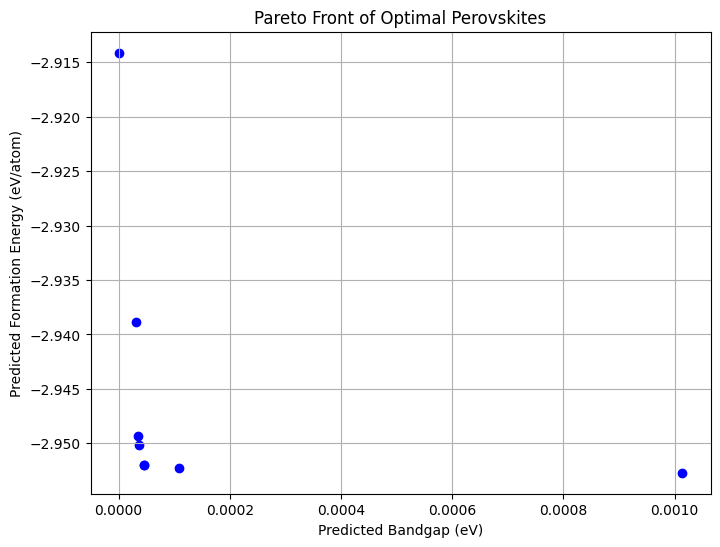

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(pareto_df['Bandgap'], pareto_df['Formation_Energy'], c='blue')
plt.xlabel('Predicted Bandgap (eV)')
plt.ylabel('Predicted Formation Energy (eV/atom)')
plt.title('Pareto Front of Optimal Perovskites')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	100   
1  	200   
2  	200   
3  	200   
4  	200   
5  	200   
6  	200   
7  	200   
8  	200   
9  	200   
10 	200   
11 	200   
12 	200   
13 	200   
14 	200   
15 	200   
16 	200   
17 	200   
18 	200   
19 	200   
20 	200   
21 	200   
22 	200   
23 	200   
24 	200   
25 	200   
26 	200   
27 	200   
28 	200   
29 	200   
30 	200   
31 	200   
32 	200   
33 	200   
34 	200   
35 	200   
36 	200   
37 	200   
38 	200   
39 	200   
40 	200   
41 	200   
42 	200   
43 	200   
44 	200   
45 	200   
46 	200   
47 	200   
48 	200   
49 	200   
50 	200   


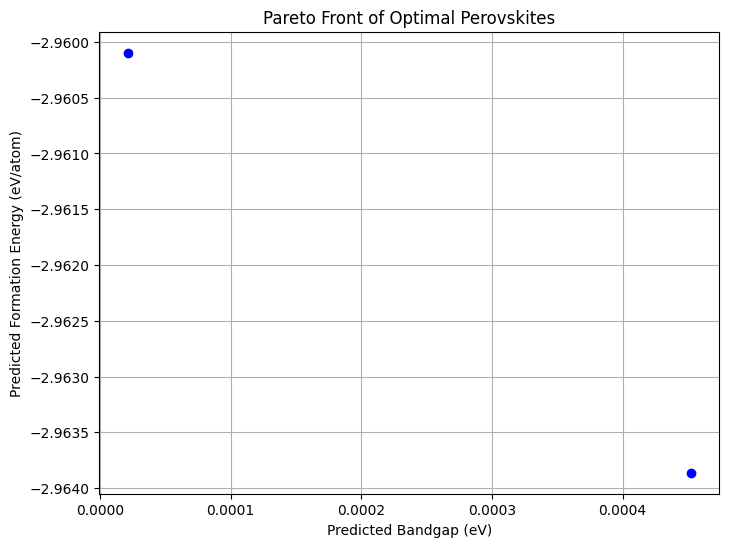

,FE_Features,BG_Features,Formation_Energy,Bandgap,Composition
1,"[-0.7171243662787782, 1.480861528484258, 1.152...","[1.648928016629656, 2.0275840338678166, 1.4167...",-2.963862,0.000453,Y1 W1 N3
0,"[-0.702663862066659, 1.3845544991328835, 1.155...","[1.8798131442455697, 2.21621014627552, 1.38398...",-2.960097,0.000021,Mg1 P1 S3


In [22]:
# Step 0: Imports
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

# Step 1: Load trained models
model_fe = joblib.load('/kaggle/input/fe-lightgbm/best_model_LightGBM.pkl')
model_bg = joblib.load('/kaggle/input/bg-cat/best_model_CatBoost.pkl')

# Step 2: Load datasets
fe = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_fe.csv")
bg = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_bg.csv", index_col=0)

# Step 3: Separate features
X_fe = fe.drop(columns=['Unnamed: 0', 'composition', 'formation_energy (eV/atom)'])
X_bg = bg.drop(columns=['composition', 'band_gap (eV)'])

# Step 4: Scale features
scaler_X_fe = StandardScaler()
X_fe_scaled = scaler_X_fe.fit_transform(X_fe)

scaler_X_bg = StandardScaler()
X_bg_scaled = scaler_X_bg.fit_transform(X_bg)

# Step 5: Feature bounds for NSGA-II
feature_bounds_fe = [(X_fe_scaled[:, i].min(), X_fe_scaled[:, i].max()) for i in range(X_fe_scaled.shape[1])]
feature_bounds_bg = [(X_bg_scaled[:, i].min(), X_bg_scaled[:, i].max()) for i in range(X_bg_scaled.shape[1])]
feature_bounds = feature_bounds_fe + feature_bounds_bg

# Step 6: Fitness function
def fitness_function(individual):
    # Split chromosome
    x_fe = np.array(individual[:X_fe_scaled.shape[1]]).reshape(1, -1)
    x_bg = np.array(individual[X_fe_scaled.shape[1]:]).reshape(1, -1)
    
    # Predict
    fe_pred = model_fe.predict(x_fe)[0]
    bg_pred = model_bg.predict(x_bg)[0]
    
    # Objectives: minimize FE, target bandgap ~1.4 eV
    return fe_pred, abs(bg_pred - 1.4)

# Step 7: DEAP setup
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Attribute generators
for i, (low, high) in enumerate(feature_bounds):
    toolbox.register(f"attr_{i}", random.uniform, low, high)

# Individual & population
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [toolbox.__getattribute__(f"attr_{i}") for i in range(len(feature_bounds))],
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operators
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxSimulatedBinaryBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Step 8: Run NSGA-II
population = toolbox.population(n=100)
algorithms.eaMuPlusLambda(population, toolbox,
                          mu=100, lambda_=200,
                          cxpb=0.9, mutpb=0.1,
                          ngen=50, verbose=True)

# Step 9: Pareto front
pareto = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Step 10: Collect results
results = []
for ind in pareto:
    x_fe = np.array(ind[:X_fe_scaled.shape[1]])
    x_bg = np.array(ind[X_fe_scaled.shape[1]:])
    fe_pred, bg_pred = fitness_function(ind)
    results.append({'FE_Features': x_fe, 'BG_Features': x_bg,
                    'Formation_Energy': fe_pred, 'Bandgap': bg_pred})

pareto_df = pd.DataFrame(results)
pareto_df.sort_values(by='Formation_Energy', inplace=True)

# Step 11: Retrieve closest real composition using full FE+BG scaled vector
X_full_scaled = np.hstack([X_fe_scaled, X_bg_scaled])
comp_list = fe['composition'].values  # same order as FE dataset

def find_nearest_composition_full(individual):
    x_full = np.array(individual).reshape(1, -1)
    idx = np.argmin(np.linalg.norm(X_full_scaled - x_full, axis=1))
    return comp_list[idx]

composition_opt = [find_nearest_composition_full(ind) for ind in pareto]
pareto_df['Composition'] = composition_opt

# Step 12: Plot Pareto front
plt.figure(figsize=(8,6))
plt.scatter(pareto_df['Bandgap'], pareto_df['Formation_Energy'], c='blue')
plt.xlabel('Predicted Bandgap (eV)')
plt.ylabel('Predicted Formation Energy (eV/atom)')
plt.title('Pareto Front of Optimal Perovskites')
plt.grid(True)
plt.show()

# Step 13: Display final DataFrame
pareto_df


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	100   
1  	200   
2  	200   
3  	200   
4  	200   
5  	200   
6  	200   
7  	200   
8  	200   
9  	200   
10 	200   
11 	200   
12 	200   
13 	200   
14 	200   
15 	200   
16 	200   
17 	200   
18 	200   
19 	200   
20 	200   
21 	200   
22 	200   
23 	200   
24 	200   
25 	200   
26 	200   
27 	200   
28 	200   
29 	200   
30 	200   
31 	200   
32 	200   
33 	200   
34 	200   
35 	200   
36 	200   
37 	200   
38 	200   
39 	200   
40 	200   
41 	200   
42 	200   
43 	200   
44 	200   
45 	200   
46 	200   
47 	200   
48 	200   
49 	200   
50 	200   


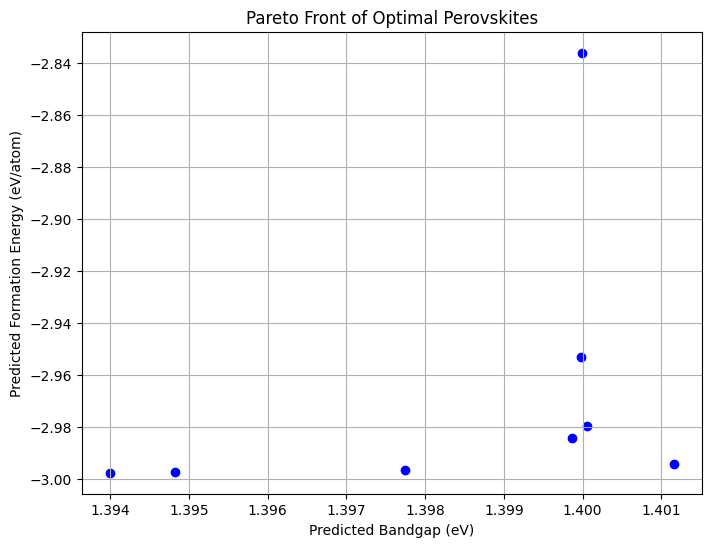

,FE_Features,BG_Features,Formation_Energy,Bandgap,Composition
7,"[-0.7119140266417857, 1.7593797132906002, 1.18...","[2.7621419663868583, 1.953107141100673, 1.4934...",-2.997527,1.393996,Nd1 Cr1 Se3
4,"[-0.7117578161997982, 1.7765599605891327, 1.18...","[3.031014388174105, 1.954120670554219, 2.40922...",-2.997264,1.394821,U1 Pd1 Se3
5,"[-0.7127178287767162, 1.786326608671179, 1.158...","[3.0427413797537413, -1.2108588807958194, 1.50...",-2.996310,1.397740,Eu1 Hf1 S3
6,"[-0.7117736643869516, 1.7632726950450859, 1.15...","[2.811981165610923, -0.6712962183619249, -0.96...",-2.994144,1.401157,U1 Pd1 Se3
3,"[-0.7119105325321323, 1.7593797132906002, 1.18...","[2.6915935400104267, -0.9016274488119421, 2.46...",-2.984090,1.399872,Ba1 Ta1 S3
0,"[-0.6980997586767532, 1.7340695542819133, 1.15...","[2.8356897568999626, -1.2311543673576937, 1.48...",-2.979400,1.400062,Nb1 Te1 Br3
2,"[-0.7763735111514393, 1.764650764296298, 1.185...","[2.3202182483893865, -1.1510128250352867, 2.43...",-2.952883,1.399986,U1 Pd1 Se3
1,"[-0.7891804045011771, 1.7580951153802522, 1.20...","[2.9561112764088637, -1.1238198045108478, 2.54...",-2.836135,1.399998,U1 Pd1 Se3


In [23]:
# Step 0: Imports
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

# Step 1: Load trained models
model_fe = joblib.load('/kaggle/input/fe-lightgbm/best_model_LightGBM.pkl')
model_bg = joblib.load('/kaggle/input/bg-cat/best_model_CatBoost.pkl')

# Step 2: Load datasets
fe = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_fe.csv")
bg = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_bg.csv", index_col=0)

# Step 3: Separate features
X_fe = fe.drop(columns=['Unnamed: 0', 'composition', 'formation_energy (eV/atom)'])
X_bg = bg.drop(columns=['composition', 'band_gap (eV)'])

# Step 4: Scale features
scaler_X_fe = StandardScaler()
X_fe_scaled = scaler_X_fe.fit_transform(X_fe)

scaler_X_bg = StandardScaler()
X_bg_scaled = scaler_X_bg.fit_transform(X_bg)

# Step 5: Feature bounds for NSGA-II
feature_bounds_fe = [(X_fe_scaled[:, i].min(), X_fe_scaled[:, i].max()) for i in range(X_fe_scaled.shape[1])]
feature_bounds_bg = [(X_bg_scaled[:, i].min(), X_bg_scaled[:, i].max()) for i in range(X_bg_scaled.shape[1])]
feature_bounds = feature_bounds_fe + feature_bounds_bg

# Step 6: Fitness function
def fitness_function(individual):
    # Split chromosome
    x_fe = np.array(individual[:X_fe_scaled.shape[1]]).reshape(1, -1)
    x_bg = np.array(individual[X_fe_scaled.shape[1]:]).reshape(1, -1)
    
    # Predict
    fe_pred = model_fe.predict(x_fe)[0]
    bg_pred = model_bg.predict(x_bg)[0]
    
    # Objectives: minimize FE, make BG close to 1.4 eV
    return fe_pred, abs(bg_pred - 1.4), bg_pred  # return bg_pred too for storing

# Step 7: DEAP setup
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Attribute generators
for i, (low, high) in enumerate(feature_bounds):
    toolbox.register(f"attr_{i}", random.uniform, low, high)

# Individual & population
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [toolbox.__getattribute__(f"attr_{i}") for i in range(len(feature_bounds))],
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operators
toolbox.register("evaluate", lambda ind: fitness_function(ind)[:2])  # only objectives
toolbox.register("mate", tools.cxSimulatedBinaryBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Step 8: Run NSGA-II
population = toolbox.population(n=100)
algorithms.eaMuPlusLambda(population, toolbox,
                          mu=100, lambda_=200,
                          cxpb=0.9, mutpb=0.1,
                          ngen=50, verbose=True)

# Step 9: Pareto front
pareto = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Step 10: Collect results with actual bandgap
results = []
for ind in pareto:
    x_fe = np.array(ind[:X_fe_scaled.shape[1]])
    x_bg = np.array(ind[X_fe_scaled.shape[1]:])
    
    fe_pred = model_fe.predict(x_fe.reshape(1, -1))[0]
    bg_pred = model_bg.predict(x_bg.reshape(1, -1))[0]  # Actual bandgap
    
    results.append({'FE_Features': x_fe, 'BG_Features': x_bg,
                    'Formation_Energy': fe_pred,
                    'Bandgap': bg_pred})

pareto_df = pd.DataFrame(results)
pareto_df.sort_values(by='Formation_Energy', inplace=True)

# Step 11: Retrieve closest real composition using full FE+BG vector
X_full_scaled = np.hstack([X_fe_scaled, X_bg_scaled])
comp_list = fe['composition'].values  # same order as FE dataset

def find_nearest_composition_full(individual):
    x_full = np.array(individual).reshape(1, -1)
    idx = np.argmin(np.linalg.norm(X_full_scaled - x_full, axis=1))
    return comp_list[idx]

composition_opt = [find_nearest_composition_full(ind) for ind in pareto]
pareto_df['Composition'] = composition_opt

# Step 12: Plot Pareto front
plt.figure(figsize=(8,6))
plt.scatter(pareto_df['Bandgap'], pareto_df['Formation_Energy'], c='blue')
plt.xlabel('Predicted Bandgap (eV)')
plt.ylabel('Predicted Formation Energy (eV/atom)')
plt.title('Pareto Front of Optimal Perovskites')
plt.grid(True)
plt.show()

# Step 13: Display final DataFrame
pareto_df


In [24]:
# Step 1: Find common compositions between FE and BG datasets
fe_compositions = set(fe['composition'].values)
bg_compositions = set(bg['composition'].values)
common_compositions = fe_compositions.intersection(bg_compositions)

print(f"Common compositions: {len(common_compositions)}")

# Step 2: Create aligned datasets for common compositions
fe_common = fe[fe['composition'].isin(common_compositions)].reset_index(drop=True)
bg_common = bg[bg['composition'].isin(common_compositions)].reset_index(drop=True)

# Ensure same order
fe_common = fe_common.sort_values('composition').reset_index(drop=True)
bg_common = bg_common.sort_values('composition').reset_index(drop=True)

# Step 3: Extract features for both models
X_fe_common = fe_common.drop(columns=['Unnamed: 0', 'composition', 'formation_energy (eV/atom)'])
X_bg_common = bg_common.drop(columns=['composition', 'band_gap (eV)'])

# Step 4: Scale features
X_fe_scaled = scaler_X_fe.transform(X_fe_common)
X_bg_scaled = scaler_X_bg.transform(X_bg_common)

# Step 5: Predict properties for all common compositions
fe_predictions = model_fe.predict(X_fe_scaled)
bg_predictions = model_bg.predict(X_bg_scaled)

# Step 6: Create results DataFrame
results = pd.DataFrame({
    'Composition': fe_common['composition'],
    'Formation_Energy': fe_predictions,
    'Bandgap': bg_predictions,
    'BG_Deviation': np.abs(bg_predictions - 1.4)
})

# Step 7: Multi-objective filtering
# Filter by bandgap range (1.3-1.5 eV for optimal solar cells)
optimal_candidates = results[
    (results['Bandgap'] >= 1.3) & 
    (results['Bandgap'] <= 1.5)
].copy()

# Step 8: Pareto front calculation
from scipy.spatial import distance

def is_pareto_efficient(costs):
    """Find Pareto efficient points"""
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            # Remove dominated points
            is_efficient[is_efficient] = np.any(costs[is_efficient] <= c, axis=1)
            is_efficient[i] = True
    return is_efficient

# Minimize both formation energy and deviation from 1.4 eV
objectives = optimal_candidates[['Formation_Energy', 'BG_Deviation']].values
pareto_mask = is_pareto_efficient(objectives)

pareto_optimal = optimal_candidates[pareto_mask].sort_values('Formation_Energy')

print(f"Pareto optimal compositions: {len(pareto_optimal)}")
pareto_optimal


Common compositions: 1012
Pareto optimal compositions: 4


,Composition,Formation_Energy,Bandgap,BG_Deviation
94,Ca1 Hf1 O3,-2.207370,1.440027,0.040027
854,Sr1 Hf1 O3,-2.065245,1.411981,0.011981
616,Na1 Ta1 O3,-1.375638,1.392242,0.007758
242,Cs1 Pb1 F3,-0.939478,1.395497,0.004503


In [26]:
# Step 1: Prepare composition mapping
common_comps = list(common_compositions)
comp_to_fe_idx = {comp: fe[fe['composition']==comp].index[0] for comp in common_comps}
comp_to_bg_idx = {comp: bg[bg['composition']==comp].index[0] for comp in common_comps}

# Step 2: Discrete NSGA-II setup
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Integer encoding: each individual is an index to common_compositions
toolbox.register("attr_comp_idx", random.randint, 0, len(common_comps)-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, 
                 toolbox.attr_comp_idx, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 3: Fitness function using actual compositions
def fitness_discrete(individual):
    comp_idx = individual[0]
    composition = common_comps[comp_idx]
    
    # Get indices in original datasets
    fe_idx = comp_to_fe_idx[composition]
    bg_idx = comp_to_bg_idx[composition]
    
    # Predict properties
    fe_pred = model_fe.predict(X_fe_scaled[fe_idx:fe_idx+1])[0]
    bg_pred = model_bg.predict(X_bg_scaled[bg_idx:bg_idx+1])[0]
    
    # Objectives
    obj1 = fe_pred
    obj2 = abs(bg_pred - 1.4)
    
    return obj1, obj2

toolbox.register("evaluate", fitness_discrete)

# Step 4: Discrete genetic operators
def mate_discrete(ind1, ind2):
    """Uniform crossover for discrete composition indices"""
    if random.random() < 0.5:
        ind1[0], ind2[0] = ind2[0], ind1[0]
    return ind1, ind2

def mutate_discrete(individual, indpb=0.3):
    """Random reset mutation"""
    if random.random() < indpb:
        individual[0] = random.randint(0, len(common_comps)-1)
    return individual,

toolbox.register("mate", mate_discrete)
toolbox.register("mutate", mutate_discrete)
toolbox.register("select", tools.selNSGA2)

# Step 5: Run NSGA-II with larger population for diversity
population = toolbox.population(n=500)  # Larger population
algorithms.eaMuPlusLambda(population, toolbox,
                          mu=500, lambda_=1000,
                          cxpb=0.7, mutpb=0.3,
                          ngen=100, verbose=True)

# Step 6: Extract Pareto front with unique compositions
pareto = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Remove duplicates
unique_compositions = {}
for ind in pareto:
    comp_idx = ind[0]
    composition = common_comps[comp_idx]
    
    if composition not in unique_compositions:
        fe_idx = comp_to_fe_idx[composition]
        bg_idx = comp_to_bg_idx[composition]
        
        fe_pred = model_fe.predict(X_fe_scaled[fe_idx:fe_idx+1])[0]
        bg_pred = model_bg.predict(X_bg_scaled[bg_idx:bg_idx+1])[0]
        
        unique_compositions[composition] = {
            'Formation_Energy': fe_pred,
            'Bandgap': bg_pred
        }

pareto_df = pd.DataFrame([
    {'Composition': comp, **props} 
    for comp, props in unique_compositions.items()
]).sort_values('Formation_Energy')

print(f"Unique Pareto optimal compositions: {len(pareto_df)}")
pareto_df


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	500   
1  	1000  
2  	1000  
3  	1000  
4  	1000  
5  	1000  
6  	1000  
7  	1000  
8  	1000  
9  	1000  
10 	1000  
11 	1000  
12 	1000  
13 	1000  
14 	1000  
15 	1000  
16 	1000  
17 	1000  
18 	1000  
19 	1000  
20 	1000  
21 	1000  
22 	1000  
23 	1000  
24 	1000  
25 	1000  
26 	1000  
27 	1000  
28 	1000  
29 	1000  
30 	1000  
31 	1000  
32 	1000  
33 	1000  
34 	1000  
35 	1000  
36 	1000  
37 	1000  
38 	1000  
39 	1000  
40 	1000  
41 	1000  
42 	1000  
43 	1000  
44 	1000  
45 	1000  
46 	1000  
47 	1000  
48 	1000  
49 	1000  
50 	1000  
51 	1000  
52 	1000  
53 	1000  
54 	1000  
55 	1000  
56 	1000  
57 	1000  
58 	1000  
59 	1000  
60 	1000  
61 	1000  
62 	1000  
63 	1000  
64 	1000  
65 	1000  
66 	1000  
67 	1000  
68 	1000  
69 	1000  
70 	1000  
71 	1000  
72 	1000  
73 	1000  
74 	1000  
75 	1000  
76 	1000  
77 	1000  
78 	1000  
79 	1000  
80 	1000  
81 	1000  
82 	1000  
83 	1000  
84 	1000  
85 	1000  
86 	1000  
87 	1000  
88 	1000  
89 	1000  

,Composition,Formation_Energy,Bandgap
1,Rb1 P1 Se3,-2.354932,1.669913
3,K1 As1 O3,-2.326353,1.666807
4,Ce3 Al1 C1,-2.212536,1.271396
6,Ca3 Si1 O1,-2.207370,1.440027
2,La1 Ni1 Ge3,-2.065245,1.411981
5,Pr1 V1 Sb3,-1.375638,1.392242
0,Tm3 In1 N1,-0.939478,1.395497


In [1]:
# Step 0: Imports
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

# Step 1: Load trained models
model_fe = joblib.load('/kaggle/input/fe-lightgbm/best_model_LightGBM.pkl')
model_bg = joblib.load('/kaggle/input/bg-cat/best_model_CatBoost.pkl')

# Step 2: Load datasets
fe = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_fe.csv")
bg = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_bg.csv", index_col=0)

In [2]:
bg

,composition,band_gap (eV),sum_MeltingT,mode_NpUnfilled,sum_NpValence,avg_Electronegativity,max_Electronegativity,mode_NUnfilled,max_NpValence,mode_NpValence,...,mode_MendeleevNumber,max_MendeleevNumber,sum_Electronegativity,mode_MeltingT,range_SpaceGroupNumber,mode_Number,mode_AtomicWeight,dev_SpaceGroupNumber,dev_Column,sum_MendeleevNumber
0,Ac1 Al1 O3,4.1024,2420.87,2.0,13.0,2.606,3.44,2.0,4.0,4.0,...,87.0,87.0,13.03,54.80,213.0,8.0,15.9994,102.24,3.92,348.0
1,Ac1 Cr1 O3,2.0031,3667.40,2.0,12.0,2.616,3.44,2.0,4.0,4.0,...,87.0,87.0,13.08,54.80,217.0,8.0,15.9994,103.20,5.52,324.0
2,Ac1 Cu1 O3,0.0000,2845.17,2.0,12.0,2.664,3.44,2.0,4.0,4.0,...,87.0,87.0,13.32,54.80,213.0,8.0,15.9994,102.24,4.32,339.0
3,Ac1 Fe1 O3,0.9888,3298.40,2.0,12.0,2.650,3.44,2.0,4.0,4.0,...,87.0,87.0,13.25,54.80,217.0,8.0,15.9994,103.20,5.04,330.0
4,Ac1 Ga1 O3,2.8959,1790.31,2.0,13.0,2.646,3.44,2.0,4.0,4.0,...,87.0,87.0,13.23,54.80,213.0,8.0,15.9994,64.00,3.92,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Nd1 Lu1 S3,0.8052,4395.08,2.0,12.0,2.030,2.58,2.0,4.0,4.0,...,88.0,88.0,10.15,388.36,124.0,16.0,32.0650,59.52,6.24,324.0
1008,Nd1 Lu1 Se3,0.4956,4712.00,2.0,12.0,2.012,2.55,2.0,4.0,4.0,...,89.0,89.0,10.06,494.00,180.0,34.0,78.9600,86.40,6.24,327.0
1009,Nd1 Mn1 O3,1.8980,2977.40,2.0,12.0,2.602,3.44,2.0,4.0,4.0,...,87.0,87.0,13.01,54.80,205.0,8.0,15.9994,92.88,5.28,332.0
1010,Nd1 Ni1 Ge3,0.0000,6656.20,4.0,6.0,1.816,2.01,4.0,2.0,2.0,...,79.0,79.0,9.08,1211.40,31.0,32.0,72.6400,9.92,3.60,317.0


In [4]:
bg.describe()

,band_gap (eV),sum_MeltingT,mode_NpUnfilled,sum_NpValence,avg_Electronegativity,max_Electronegativity,mode_NUnfilled,max_NpValence,mode_NpValence,min_MeltingT,...,mode_MendeleevNumber,max_MendeleevNumber,sum_Electronegativity,mode_MeltingT,range_SpaceGroupNumber,mode_Number,mode_AtomicWeight,dev_SpaceGroupNumber,dev_Column,sum_MendeleevNumber
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,...,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,1.190654,4375.027816,1.793478,10.276680,2.269747,2.946136,2.757905,3.450593,2.919960,359.041275,...,76.658103,85.769763,11.348735,595.388617,142.052372,23.165020,52.436615,57.890356,4.447431,325.666996
std,1.577499,2819.880607,1.393015,5.262687,0.452516,0.575123,2.449830,1.299216,1.841525,469.214952,...,23.272856,6.477791,2.262579,707.716543,77.081137,18.788095,46.746380,33.883430,1.573164,56.823888
min,0.000000,150.330000,0.000000,0.000000,1.328000,1.780000,0.000000,0.000000,0.000000,14.010000,...,2.000000,72.000000,6.640000,14.010000,0.000000,1.000000,1.007940,0.000000,0.320000,111.000000
25%,0.000000,2345.780000,1.000000,6.000000,1.831500,2.550000,2.000000,2.000000,1.000000,54.800000,...,74.000000,81.000000,9.157500,54.800000,59.000000,8.000000,15.999400,19.200000,3.600000,301.000000
50%,0.257400,3693.900000,2.000000,12.000000,2.262000,3.040000,2.000000,4.000000,4.000000,63.050000,...,87.000000,87.000000,11.310000,265.800000,165.000000,16.000000,32.065000,67.920000,4.720000,328.000000
75%,2.246825,5503.985000,2.000000,15.000000,2.660000,3.440000,3.000000,4.000000,4.000000,388.360000,...,88.000000,89.000000,13.300000,1100.000000,214.000000,34.000000,78.960000,88.080000,5.520000,355.000000
max,7.061300,13772.000000,5.000000,24.000000,3.708000,3.980000,22.000000,5.000000,5.000000,2237.000000,...,96.000000,96.000000,18.540000,2750.000000,227.000000,83.000000,208.980400,104.640000,7.680000,462.000000


In [5]:
fe

,Unnamed: 0,composition,formation_energy (eV/atom),mode_AtomicWeight,max_Electronegativity,avg_Electronegativity,dev_Electronegativity,sum_Electronegativity,mode_Row,mode_GSvolume_pa,...,mode_NValence,max_MendeleevNumber,dev_NdValence,avg_CovalentRadius,avg_NpValence,min_AtomicWeight,min_SpaceGroupNumber,min_GSvolume_pa,mode_Column,min_Number
0,0,Ac1 Al1 O3,-3.690019,15.9994,3.44,2.606,1.0008,13.03,2.0,9.105000,...,6.0,87.0,0.32,106.8,2.6,15.9994,12.0,9.105000,16.0,8.0
1,1,Ac1 Cr1 O3,-3.138972,15.9994,3.44,2.616,0.9888,13.08,2.0,9.105000,...,6.0,87.0,1.52,110.4,2.4,15.9994,12.0,9.105000,16.0,8.0
2,2,Ac1 Cu1 O3,-2.422892,15.9994,3.44,2.664,0.9312,13.32,2.0,9.105000,...,6.0,87.0,3.12,109.0,2.4,15.9994,12.0,9.105000,16.0,8.0
3,3,Ac1 Fe1 O3,-2.771539,15.9994,3.44,2.650,0.9480,13.25,2.0,9.105000,...,6.0,87.0,1.84,109.0,2.4,15.9994,12.0,9.105000,16.0,8.0
4,4,Ac1 Ga1 O3,-3.063253,15.9994,3.44,2.646,0.9528,13.23,2.0,9.105000,...,6.0,87.0,3.12,107.0,2.6,15.9994,12.0,9.105000,16.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1007,Nd1 Lu1 S3,-2.393228,32.0650,2.58,2.030,0.6600,10.15,3.0,25.786875,...,6.0,88.0,0.32,140.6,2.4,32.0650,70.0,25.786875,16.0,16.0
1008,1008,Nd1 Lu1 Se3,-2.187057,78.9600,2.55,2.012,0.6456,10.06,4.0,25.920000,...,16.0,89.0,4.56,149.6,2.4,78.9600,14.0,25.920000,16.0,34.0
1009,1009,Nd1 Mn1 O3,-2.963479,15.9994,3.44,2.602,1.0056,13.01,2.0,9.105000,...,6.0,87.0,1.60,107.6,2.4,15.9994,12.0,9.105000,16.0,8.0
1010,1010,Nd1 Ni1 Ge3,-0.597557,72.6400,2.01,1.816,0.2704,9.08,4.0,23.005000,...,14.0,79.0,3.04,137.0,1.2,58.6934,194.0,10.320000,14.0,28.0


In [5]:
fe.describe()

,Unnamed: 0,formation_energy (eV/atom),mode_AtomicWeight,max_Electronegativity,avg_Electronegativity,dev_Electronegativity,sum_Electronegativity,mode_Row,mode_GSvolume_pa,mode_CovalentRadius,...,mode_NValence,max_MendeleevNumber,dev_NdValence,avg_CovalentRadius,avg_NpValence,min_AtomicWeight,min_SpaceGroupNumber,min_GSvolume_pa,mode_Column,min_Number
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,...,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,505.500000,-1.558011,52.436615,2.946136,2.269747,0.659682,11.348735,3.250988,19.554983,105.453557,...,8.218379,85.769763,2.437391,124.694269,2.055336,27.515368,77.190711,12.345905,13.349802,12.973320
std,292.283538,0.992169,46.746380,0.575123,0.452516,0.310803,2.262579,1.352087,12.853429,43.334492,...,4.827872,6.477791,1.355736,23.275159,1.052537,22.521203,76.005051,6.015313,4.881805,9.697414
min,0.000000,-3.950563,1.007940,1.780000,1.328000,0.124800,6.640000,1.000000,6.615000,31.000000,...,1.000000,72.000000,0.000000,43.200000,0.000000,1.007940,2.000000,5.640000,1.000000,1.000000
25%,252.750000,-2.395835,15.999400,2.550000,1.831500,0.360800,9.157500,2.000000,9.105000,66.000000,...,6.000000,81.000000,1.520000,106.200000,1.200000,14.006700,12.000000,9.105000,13.000000,7.000000
50%,505.500000,-1.316996,32.065000,3.040000,2.262000,0.649600,11.310000,3.000000,16.585000,105.000000,...,6.000000,87.000000,2.960000,128.000000,2.400000,15.999400,64.000000,9.707500,16.000000,8.000000
75%,758.250000,-0.671301,78.960000,3.440000,2.660000,0.914400,13.300000,4.000000,25.786875,124.000000,...,11.250000,89.000000,3.200000,141.200000,3.000000,32.065000,166.000000,14.768750,16.000000,16.000000
max,1011.000000,-0.027755,208.980400,3.980000,3.708000,1.497600,18.540000,6.000000,115.765000,244.000000,...,29.000000,96.000000,4.800000,187.400000,4.800000,127.600000,225.000000,43.015000,17.000000,53.000000


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	250   
1  	339   
2  	336   
3  	332   
4  	330   
5  	332   
6  	339   
7  	336   
8  	328   
9  	332   
10 	332   
11 	331   
12 	337   
13 	332   
14 	331   
15 	336   
16 	332   
17 	336   
18 	328   
19 	331   
20 	332   
21 	333   
22 	339   
23 	330   
24 	330   
25 	338   
26 	335   
27 	327   
28 	328   
29 	335   
30 	334   
31 	335   
32 	324   
33 	330   
34 	325   
35 	336   
36 	337   
37 	330   
38 	327   
39 	328   
40 	334   
41 	332   
42 	330   
43 	332   
44 	340   
45 	331   
46 	333   
47 	335   
48 	333   
49 	326   
50 	327   
51 	335   
52 	334   
53 	340   
54 	334   
55 	330   
56 	320   
57 	334   
58 	335   
59 	335   
60 	331   


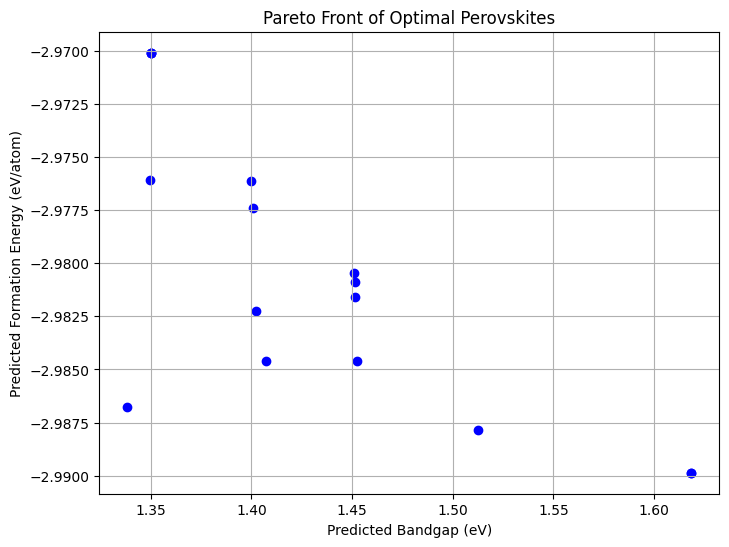

,FE_Features,BG_Features,Formation_Energy,Bandgap,Composition
6,"[-0.7533642535896747, 1.586306540310729, 1.426...","[2.528162153276661, -0.5957106712479241, 1.091...",-2.989860,1.618403,U1 Pd1 Se3
5,"[-0.7533642535896747, 1.586306540310729, 1.426...","[2.528162153276661, -0.5957106712479241, 1.091...",-2.989860,1.618403,U1 Pd1 Se3
9,"[-0.7483316533917127, 1.7794327689216414, 1.42...","[3.0857249565573124, -0.5505048307314195, 1.53...",-2.987836,1.512536,U1 Pd1 Se3
15,"[-0.7596780902819713, 1.781450879890345, 1.431...","[2.7158944590507774, -1.0657088496108977, 0.90...",-2.986760,1.338396,Nb1 Te1 Br3
14,"[-0.7557224718234493, 1.5822846672368451, 1.43...","[2.6440371007081964, 0.9064126789997886, 0.978...",-2.984625,1.406977,Ba1 Ta1 S3
8,"[-0.7481487581375444, 1.7973908773483958, 1.43...","[2.1728742645544727, -0.5875307564543871, 1.08...",-2.984603,1.452260,Th1 Mn1 Se3
13,"[-0.7538825733973882, 1.5823458705510396, 1.43...","[2.528162153276661, -0.5957106712479241, 1.112...",-2.982260,1.402198,Th1 Mn1 Se3
12,"[-0.7563422347004648, 1.5823013244205075, 1.43...","[2.6744685058685382, -1.2269521757820012, 1.01...",-2.981582,1.451672,Nb1 Te1 Br3
3,"[-0.7607248760613513, 1.6482097347429427, 1.43...","[1.1269442417431454, -0.5792239807586412, 1.08...",-2.980871,1.451430,U1 Pd1 Se3
10,"[-0.7558613111583072, 1.6347191341580338, 1.43...","[3.008972313166489, -1.019339558496253, 1.8035...",-2.980440,1.451128,U1 Pd1 Se3


In [7]:
# Step 3: Separate features
X_fe = fe.drop(columns=['Unnamed: 0', 'composition', 'formation_energy (eV/atom)'])
X_bg = bg.drop(columns=['composition', 'band_gap (eV)'])

# Step 4: Scale features
scaler_X_fe = StandardScaler()
X_fe_scaled = scaler_X_fe.fit_transform(X_fe)

scaler_X_bg = StandardScaler()
X_bg_scaled = scaler_X_bg.fit_transform(X_bg)

# Step 5: Feature bounds for NSGA-II
feature_bounds_fe = [(X_fe_scaled[:, i].min(), X_fe_scaled[:, i].max()) for i in range(X_fe_scaled.shape[1])]
feature_bounds_bg = [(X_bg_scaled[:, i].min(), X_bg_scaled[:, i].max()) for i in range(X_bg_scaled.shape[1])]
feature_bounds = feature_bounds_fe + feature_bounds_bg

# Step 6: Fitness function
def fitness_function(individual):
    x_fe = np.array(individual[:X_fe_scaled.shape[1]]).reshape(1, -1)
    x_bg = np.array(individual[X_fe_scaled.shape[1]:]).reshape(1, -1)
    
    fe_pred = model_fe.predict(x_fe)[0]
    bg_pred = model_bg.predict(x_bg)[0]
    
    # Multiple target bandgaps for diversity
    bg_targets = [1.35, 1.40, 1.45]
    bg_penalty = min([abs(bg_pred - target) for target in bg_targets])
    
    return fe_pred, bg_penalty

# Step 7: DEAP setup
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Attribute generators
for i, (low, high) in enumerate(feature_bounds):
    toolbox.register(f"attr_{i}", random.uniform, low, high)

# Individual & population
toolbox.register("individual", tools.initCycle, creator.Individual,
                 [toolbox.__getattribute__(f"attr_{i}") for i in range(len(feature_bounds))],
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operators
toolbox.register("evaluate", lambda ind: fitness_function(ind)[:2])  # only objectives
toolbox.register("mate", tools.cxSimulatedBinaryBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded,
                 low=[l for l,_ in feature_bounds],
                 up=[h for _,h in feature_bounds],
                 eta=20.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Step 8: Run NSGA-II
population = toolbox.population(n=250)
algorithms.eaMuPlusLambda(population, toolbox,
                          mu=250, lambda_=350,
                          cxpb=0.7, mutpb=0.25,
                          ngen=60, verbose=True)

# Step 9: Pareto front
pareto = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Step 10: Collect results with actual bandgap
results = []
for ind in pareto:
    x_fe = np.array(ind[:X_fe_scaled.shape[1]])
    x_bg = np.array(ind[X_fe_scaled.shape[1]:])
    
    fe_pred = model_fe.predict(x_fe.reshape(1, -1))[0]
    bg_pred = model_bg.predict(x_bg.reshape(1, -1))[0]  # Actual bandgap
    
    results.append({'FE_Features': x_fe, 'BG_Features': x_bg,
                    'Formation_Energy': fe_pred,
                    'Bandgap': bg_pred})

pareto_df = pd.DataFrame(results)
pareto_df.sort_values(by='Formation_Energy', inplace=True)

# Step 11: Retrieve closest real composition using full FE+BG vector
X_full_scaled = np.hstack([X_fe_scaled, X_bg_scaled])
comp_list = fe['composition'].values  # same order as FE dataset

def find_nearest_composition_full(individual):
    x_full = np.array(individual).reshape(1, -1)
    idx = np.argmin(np.linalg.norm(X_full_scaled - x_full, axis=1))
    return comp_list[idx]

composition_opt = [find_nearest_composition_full(ind) for ind in pareto]
pareto_df['Composition'] = composition_opt

# Step 12: Plot Pareto front
plt.figure(figsize=(8,6))
plt.scatter(pareto_df['Bandgap'], pareto_df['Formation_Energy'], c='blue')
plt.xlabel('Predicted Bandgap (eV)')
plt.ylabel('Predicted Formation Energy (eV/atom)')
plt.title('Pareto Front of Optimal Perovskites')
plt.grid(True)
plt.show()

# Step 13: Display final DataFrame
pareto_df


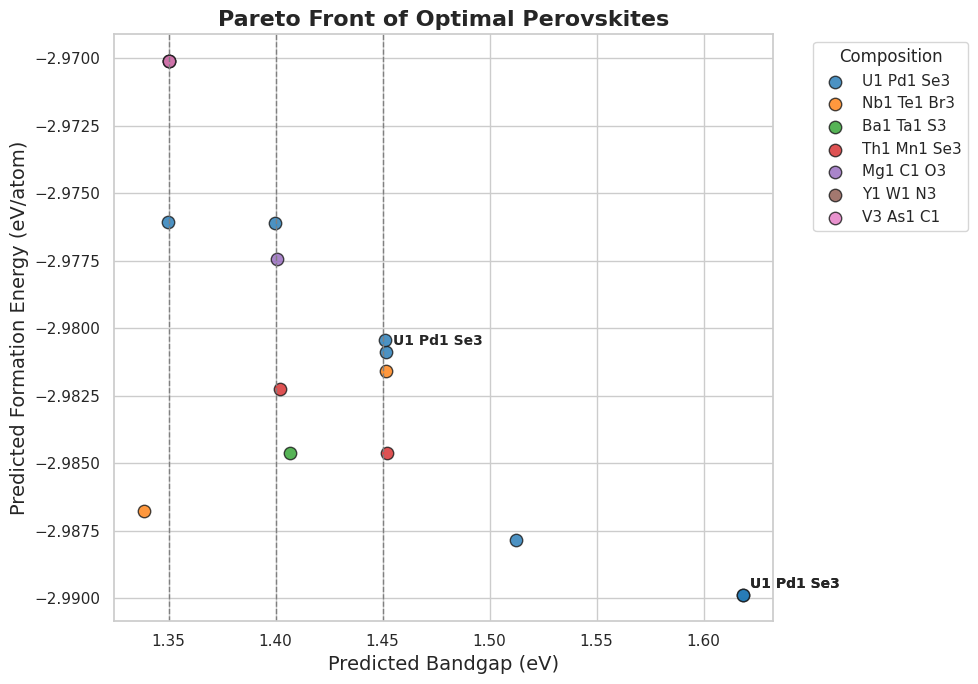

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume pareto_df has columns: 'Bandgap', 'Formation_Energy', 'Composition'
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Define target bandgaps
targets = [1.35, 1.40, 1.45]
for t in targets:
    plt.axvline(t, color='gray', linestyle='--', linewidth=1)

# Scatter with hue by composition
unique_comps = pareto_df['Composition'].unique()
palette = sns.color_palette("tab10", len(unique_comps))
comp_to_color = dict(zip(unique_comps, palette))

for comp in unique_comps:
    sub = pareto_df[pareto_df['Composition'] == comp]
    plt.scatter(sub['Bandgap'], sub['Formation_Energy'],
                label=comp, color=comp_to_color[comp],
                s=80, edgecolor='k', alpha=0.8)

# Annotate top performers
# Most stable (min FE), highest BG, and mid‐range FE/BG
most_stable = pareto_df.loc[pareto_df['Formation_Energy'].idxmin()]
highest_bg = pareto_df.loc[pareto_df['Bandgap'].idxmax()]
balanced = pareto_df.iloc[len(pareto_df)//2]

for point in [most_stable, highest_bg, balanced]:
    plt.annotate(point['Composition'],
                 (point['Bandgap'], point['Formation_Energy']),
                 textcoords="offset points", xytext=(5,5),
                 fontsize=10, fontweight='bold')

# Chart styling
plt.xlabel('Predicted Bandgap (eV)', fontsize=14)
plt.ylabel('Predicted Formation Energy (eV/atom)', fontsize=14)
plt.title('Pareto Front of Optimal Perovskites', fontsize=16, fontweight='bold')
plt.legend(title='Composition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Total compositions in FE dataset: 1012
Total compositions in BG dataset: 1012
Common compositions: 1012

Starting NSGA-II Optimization
Generation 0: Min FE=-2.3080, Min BG Dev=0.0043
Generation 10: Min FE=-2.3080, Min BG Dev=0.0043
Generation 20: Min FE=-2.3549, Min BG Dev=0.0043
Generation 30: Min FE=-2.3549, Min BG Dev=0.0043
Generation 40: Min FE=-2.3549, Min BG Dev=0.0043
Generation 50: Min FE=-2.3549, Min BG Dev=0.0043
Generation 60: Min FE=-2.3549, Min BG Dev=0.0043
Generation 70: Min FE=-2.3549, Min BG Dev=0.0043
Generation 80: Min FE=-2.3549, Min BG Dev=0.0043
Generation 90: Min FE=-2.3549, Min BG Dev=0.0043

Optimization Complete

Pareto front size: 8 unique solutions



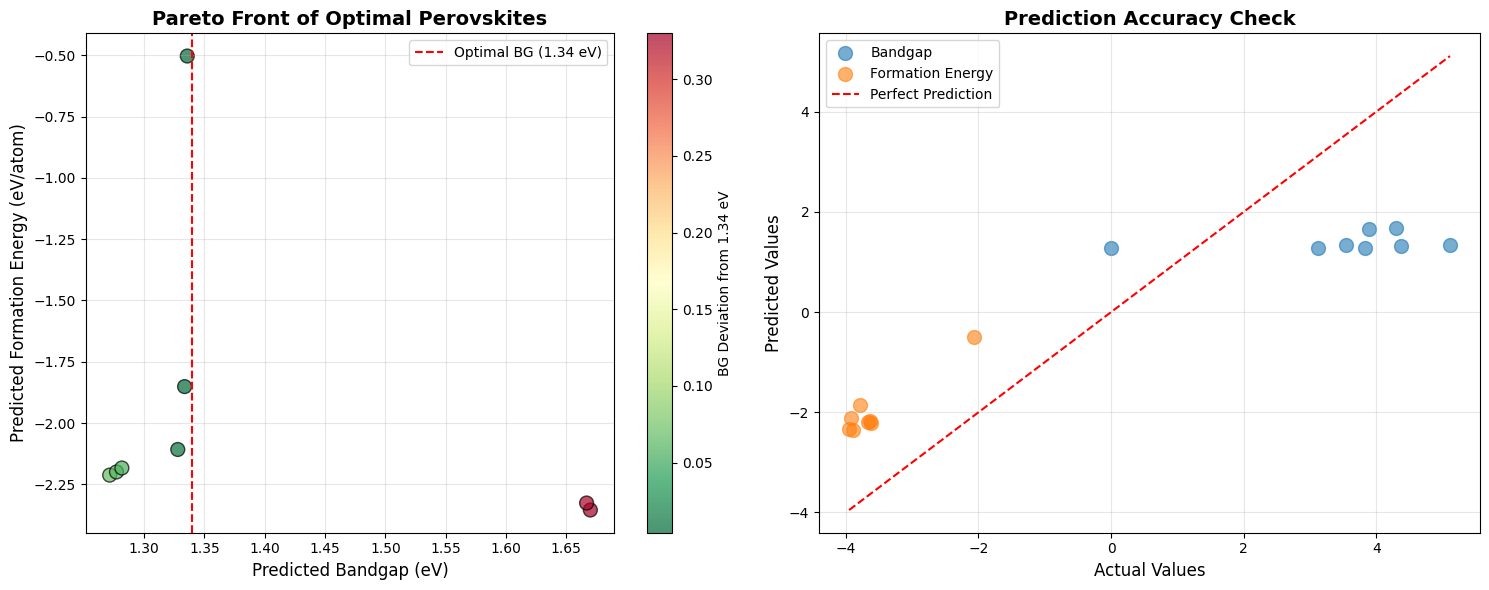

TOP 10 OPTIMAL PEROVSKITE CANDIDATES
  Composition  Formation_Energy_Predicted  Bandgap_Predicted  Formation_Energy_Actual  Bandgap_Actual  BG_Deviation_from_1.34eV
0  Nd1 Sc1 O3                   -2.354932           1.669913                -3.896464          4.3025                  0.329913
1  La1 Sc1 O3                   -2.326353           1.666807                -3.950563          3.8973                  0.326807
2  Ce1 Al1 O3                   -2.212536           1.271396                -3.620339          0.0000                  0.068604
3  Ca1 Zr1 O3                   -2.199609           1.277035                -3.670175          3.8263                  0.062965
4  Ba1 Zr1 O3                   -2.183544           1.281498                -3.639241          3.1163                  0.058502
5  Sm1 Sc1 O3                   -2.108046           1.327848                -3.921264          4.3669                  0.012152
6  Ba1 Hf1 O3                   -1.851517           1.333500       

In [4]:
# Step 0: Enhanced Imports
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CRITICAL FIX: We need to work with COMPOSITIONS, not raw features
# =============================================================================

# Step 1: Load trained models
model_fe = joblib.load('/kaggle/input/fe-lightgbm/best_model_LightGBM.pkl')
model_bg = joblib.load('/kaggle/input/bg-cat/best_model_CatBoost.pkl')

# Step 2: Load datasets
fe_data = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_fe.csv")
bg_data = pd.read_csv("/kaggle/input/magpie-fe-bg/magpie_selected_features_for_bg.csv", index_col=0)

# Step 3: Prepare feature sets
X_fe = fe_data.drop(columns=['Unnamed: 0', 'composition', 'formation_energy (eV/atom)'])
X_bg = bg_data.drop(columns=['composition', 'band_gap (eV)'])
y_fe = fe_data['formation_energy (eV/atom)']
y_bg = bg_data['band_gap (eV)']

# Step 4: Get common compositions (CRITICAL FIX)
# We need compositions that exist in BOTH datasets
fe_compositions = set(fe_data['composition'].values)
bg_compositions = set(bg_data['composition'].values)
common_compositions = list(fe_compositions & bg_compositions)

print(f"Total compositions in FE dataset: {len(fe_compositions)}")
print(f"Total compositions in BG dataset: {len(bg_compositions)}")
print(f"Common compositions: {len(common_compositions)}")

# Filter datasets to common compositions only
fe_common = fe_data[fe_data['composition'].isin(common_compositions)].reset_index(drop=True)
bg_common = bg_data[bg_data['composition'].isin(common_compositions)].reset_index(drop=True)

# Ensure same order
fe_common = fe_common.sort_values('composition').reset_index(drop=True)
bg_common = bg_common.sort_values('composition').reset_index(drop=True)

# Verify alignment
assert all(fe_common['composition'] == bg_common['composition']), "Composition mismatch!"

# Extract features for common compositions
X_fe_common = fe_common.drop(columns=['Unnamed: 0', 'composition', 'formation_energy (eV/atom)']).values
X_bg_common = bg_common.drop(columns=['composition', 'band_gap (eV)']).values

# Step 5: Scale features (fit on training data)
scaler_fe = StandardScaler()
scaler_bg = StandardScaler()

X_fe_scaled = scaler_fe.fit_transform(X_fe)
X_bg_scaled = scaler_bg.fit_transform(X_bg)

# Transform common compositions
X_fe_common_scaled = scaler_fe.transform(X_fe_common)
X_bg_common_scaled = scaler_bg.transform(X_bg_common)

# =============================================================================
# CRITICAL FIX: Optimize over INDICES of known compositions
# This ensures physical validity
# =============================================================================

# Step 6: NSGA-II Setup with composition indices
n_compositions = len(common_compositions)

creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))  # Minimize both
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Individual = index to composition database
toolbox.register("attr_idx", random.randint, 0, n_compositions - 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_idx, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 7: Fitness function with actual targets
def evaluate(individual):
    idx = individual[0]  # Get composition index
    
    # Get features for this composition
    x_fe = X_fe_common_scaled[idx].reshape(1, -1)
    x_bg = X_bg_common_scaled[idx].reshape(1, -1)
    
    # Predict properties
    fe_pred = model_fe.predict(x_fe)[0]
    bg_pred = model_bg.predict(x_bg)[0]
    
    # Objective 1: Minimize formation energy (stability)
    obj1 = fe_pred
    
    # Objective 2: Minimize deviation from target bandgap
    # For solar cells, optimal bandgap is ~1.34 eV (Shockley-Queisser limit)
    target_bg = 1.34
    obj2 = abs(bg_pred - target_bg)
    
    return obj1, obj2

toolbox.register("evaluate", evaluate)

# Custom genetic operators for integer indices
def mutate_index(individual, indpb):
    """Mutate by randomly changing index"""
    if random.random() < indpb:
        individual[0] = random.randint(0, n_compositions - 1)
    return individual,

def mate_index(ind1, ind2):
    """Simple crossover for indices"""
    if random.random() < 0.5:
        ind1[0], ind2[0] = ind2[0], ind1[0]
    return ind1, ind2

toolbox.register("mate", mate_index)
toolbox.register("mutate", mutate_index, indpb=0.3)
toolbox.register("select", tools.selNSGA2)

# Step 8: Run NSGA-II with better parameters
print("\n" + "="*60)
print("Starting NSGA-II Optimization")
print("="*60)

random.seed(42)
np.random.seed(42)

# Larger population for better diversity
pop_size = 500
n_generations = 100

population = toolbox.population(n=pop_size)

# Evaluate initial population
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

# Evolution with statistics
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)
stats.register("avg", np.mean, axis=0)

logbook = tools.Logbook()
logbook.header = "gen", "min", "max", "avg"

for gen in range(n_generations):
    # Select offspring
    offspring = toolbox.select(population, pop_size)
    offspring = list(map(toolbox.clone, offspring))
    
    # Apply crossover
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.7:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    # Apply mutation
    for mutant in offspring:
        if random.random() < 0.3:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    # Evaluate invalid individuals
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    # Replacement
    population[:] = toolbox.select(population + offspring, pop_size)
    
    # Statistics
    record = stats.compile(population)
    logbook.record(gen=gen, **record)
    
    if gen % 10 == 0:
        print(f"Generation {gen}: Min FE={record['min'][0]:.4f}, Min BG Dev={record['min'][1]:.4f}")

print("\n" + "="*60)
print("Optimization Complete")
print("="*60 + "\n")

# Step 9: Extract Pareto Front
pareto_front = tools.sortNondominated(population, pop_size, first_front_only=True)[0]

# Remove duplicates
unique_pareto = []
seen_indices = set()
for ind in pareto_front:
    idx = ind[0]
    if idx not in seen_indices:
        unique_pareto.append(ind)
        seen_indices.add(idx)

print(f"Pareto front size: {len(unique_pareto)} unique solutions\n")

# Step 10: Create results dataframe
results = []
for ind in unique_pareto:
    idx = ind[0]
    composition = fe_common['composition'].iloc[idx]
    
    x_fe = X_fe_common_scaled[idx].reshape(1, -1)
    x_bg = X_bg_common_scaled[idx].reshape(1, -1)
    
    fe_pred = model_fe.predict(x_fe)[0]
    bg_pred = model_bg.predict(x_bg)[0]
    
    # Also get actual values from dataset
    fe_actual = fe_common['formation_energy (eV/atom)'].iloc[idx]
    bg_actual = bg_common['band_gap (eV)'].iloc[idx]
    
    results.append({
        'Composition': composition,
        'Formation_Energy_Predicted': fe_pred,
        'Bandgap_Predicted': bg_pred,
        'Formation_Energy_Actual': fe_actual,
        'Bandgap_Actual': bg_actual,
        'BG_Deviation_from_1.34eV': abs(bg_pred - 1.34)
    })

pareto_df = pd.DataFrame(results)
pareto_df = pareto_df.sort_values('Formation_Energy_Predicted').reset_index(drop=True)

# Step 11: Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Pareto Front
ax1 = axes[0]
scatter = ax1.scatter(pareto_df['Bandgap_Predicted'], 
                     pareto_df['Formation_Energy_Predicted'],
                     c=pareto_df['BG_Deviation_from_1.34eV'],
                     cmap='RdYlGn_r', s=100, alpha=0.7, edgecolors='black')
ax1.axvline(x=1.34, color='red', linestyle='--', label='Optimal BG (1.34 eV)')
ax1.set_xlabel('Predicted Bandgap (eV)', fontsize=12)
ax1.set_ylabel('Predicted Formation Energy (eV/atom)', fontsize=12)
ax1.set_title('Pareto Front of Optimal Perovskites', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='BG Deviation from 1.34 eV')

# Plot 2: Predicted vs Actual
ax2 = axes[1]
ax2.scatter(pareto_df['Bandgap_Actual'], pareto_df['Bandgap_Predicted'], 
           label='Bandgap', alpha=0.6, s=100)
ax2.scatter(pareto_df['Formation_Energy_Actual'], pareto_df['Formation_Energy_Predicted'],
           label='Formation Energy', alpha=0.6, s=100)
min_val = min(pareto_df[['Bandgap_Actual', 'Bandgap_Predicted', 
                         'Formation_Energy_Actual', 'Formation_Energy_Predicted']].min())
max_val = max(pareto_df[['Bandgap_Actual', 'Bandgap_Predicted',
                         'Formation_Energy_Actual', 'Formation_Energy_Predicted']].max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
ax2.set_xlabel('Actual Values', fontsize=12)
ax2.set_ylabel('Predicted Values', fontsize=12)
ax2.set_title('Prediction Accuracy Check', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 12: Display top candidates
print("="*80)
print("TOP 10 OPTIMAL PEROVSKITE CANDIDATES")
print("="*80)
print(pareto_df.head(10).to_string(index=True))

# Step 13: Save results
pareto_df.to_csv('optimal_perovskites_nsga2.csv', index=False)
print("\n✓ Results saved to 'optimal_perovskites_nsga2.csv'")

# Step 14: Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"Best Formation Energy: {pareto_df['Formation_Energy_Predicted'].min():.4f} eV/atom")
print(f"Best Bandgap (closest to 1.34 eV): {pareto_df.loc[pareto_df['BG_Deviation_from_1.34eV'].idxmin(), 'Bandgap_Predicted']:.4f} eV")
print(f"Composition with best BG: {pareto_df.loc[pareto_df['BG_Deviation_from_1.34eV'].idxmin(), 'Composition']}")
print(f"Composition with best FE: {pareto_df.loc[pareto_df['Formation_Energy_Predicted'].idxmin(), 'Composition']}")
print("\n" + "="*80)